In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

In [ ]:
 max 2x1 + x2 + 4x3 + 15x4
s.t. 4x1 + x2 + 2x3 + 3x4 ≤ 700
4x1 + 2x2 + x3 + 5x4 ≤ 700
x1, x2, x3, x4 ≥ 0.

# 1

$min\ -2x_1 - x_2 - 4x_3 - 15x_4 \\
s.t.\ 4x_1 + x_2 + 2x_3 + 3x_4 \leq 700 \\
\quad 4x_1 + 2x_2 + x_3 + 5x_4 \leq 700 \\
\quad x_1, x_2, x_3, x_4 \geq 0 $

## 1.1

Find the dual of the problem above.

a) First take the Lagrangian relaxation to obtain a lower bound on the primal.

$$ min\ -2x_1 - x_2 -4x_3 - 15x_4 + y_1(4x_1 + x_2 + 2x_3 + 3x_4 - 700) + y_2(4x_1 + 2x_2 + x_3 + 5x_4 - 700) \\ 
s.t.\ x_1, x_2, x_3, x_4 \geq 0 \\
y_1, y_2 \geq 0$$

b) Now we want to take the maximal lower bound, so we'll take the max of our lower bound over our ys

$$max_{y_1, y_2} min_{x_1, x_2, x_3, x_4}\ -2x_1 - x_2 -4x_3 - 15x_4 + y_1(4x_1 + x_2 + 2x_3 + 3x_4 - 700) + y_2(4x_1 + 2x_2 + x_3 + 5x_4 - 700) \\ 
s.t.\ x_1, x_2, x_3, x_4 \geq 0 \\
y_1, y_2 \geq 0$$

b) Next restructure it

$$\max_{y_1, y_2} \min_{x_1, x_2, x_3, x_4}\ x_1(-2 + 4y_1 + 4y_2) + x_2(-1 + y_1 + 2y_2) + x_3(-4 + 2y_1 + y_2) + x_4(-15 + 3y_1 + 5y_2) -700y_1 - 700y_2$$

c) which is equivalent to:

$$max\ -700y_1 - 700y_2 \\
s.t.\ 4y_1 + 4y_2 \geq 2 \\
\quad y_1 + 2y_2 \geq 1 \\
\quad 2y_1 + y_2 \geq 4 \\
\quad 3y_1 + 5y_2 \geq 15\\
\quad y_1, y_2 \geq 0$$

## 1.2

Graph the feasible region

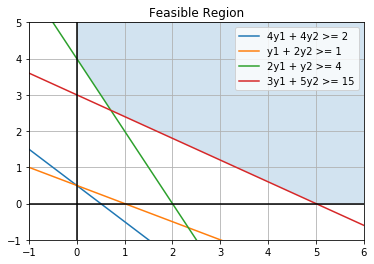

In [33]:
x = np.linspace(-5, 10, 100)
cons1 = (2 - 4*x)/4
cons2 = (1-x)/2
cons3 = 4 - 2*x
cons4 = (15 - 3*x)/5

plt.plot(x, cons1, label = '4y1 + 4y2 >= 2')
plt.plot(x, cons2, label = 'y1 + 2y2 >= 1')
plt.plot(x, cons3, label = '2y1 + y2 >= 4')
plt.plot(x, cons4, label = '3y1 + 5y2 >= 15')
plt.fill_between(x, np.maximum(0, np.maximum(cons4, np.maximum(cons3, np.maximum(cons1, cons2)))), 100*[100],
                 where = (np.maximum(0, np.maximum(cons4, np.maximum(cons3, np.maximum(cons1, cons2))))>=0) & (x >= 0), alpha = .2)
plt.axhline(0, color='black')
plt.axvline(0, color='black')
plt.xlim(xmin = -1, xmax = 6)
plt.ylim(ymin = -1, ymax = 5)
plt.grid()
plt.legend()
plt.title('Feasible Region')


Most of our dual constraints appear to be redundant. 

## 1.3

Our feasible solutions are (0, 4), (5, 0), and (5/7, 18/7)

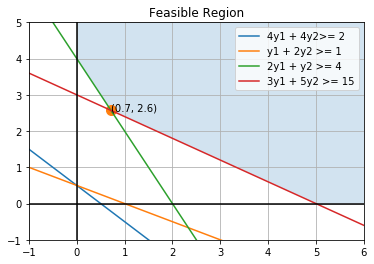

In [34]:
x = np.linspace(-5, 10, 100)
cons1 = (2 - 4*x)/4
cons2 = (1-x)/2
cons3 = 4 - 2*x
cons4 = (15 - 3*x)/5

plt.plot(x, cons1, label = '4y1 + 4y2>= 2')
plt.plot(x, cons2, label = 'y1 + 2y2 >= 1')
plt.plot(x, cons3, label = '2y1 + y2 >= 4')
plt.plot(x, cons4, label = '3y1 + 5y2 >= 15')
plt.fill_between(x, np.maximum(0, np.maximum(cons4, np.maximum(cons3, np.maximum(cons1, cons2)))), 100*[100],
                 where = (np.maximum(0, np.maximum(cons4, np.maximum(cons3, np.maximum(cons1, cons2))))>=0) & (x >= 0), alpha = .2)
plt.axhline(0, color='black')
plt.axvline(0, color='black')
plt.xlim(xmin = -1, xmax = 6)
plt.ylim(ymin = -1, ymax = 5)
plt.grid()
plt.legend()
plt.title('Feasible Region')


plt.scatter([5/7], [18/7], s=100)
plt.annotate('(%.1f, %.1f)' % (5/7, 18/7), (5/7, 18/7))




## 1.4 

Our solution gives us a solution of 2300 (thousand), which is 200 thousand more than our piratical friend. 

## 1.5

Since y1 and y2 are non-zero, both primal constraints must be active.

## 1.6

Since constraints 1 and 2 are non-active, x1 and x2 must be zero.

## 1.7

$2x_3 + 3x_4 = 700 \\
x_3 + 5x_4 = 700 \\
\\  
x_4 = 100  \\  
x_3 = 200
$

# 2
## 2.1

$ d = (d_i, \dots, d_n) : d_i \in [\overline{d_i} - \hat{d_i}, \overline{d_i} - \hat{d_i}] \\
\quad s.t. \ \sum_i^n \frac{|d_i - \overline d_i|}{\hat{d_i}} \leq \Gamma $

Since our d_i can vary from the nominal value by at most $\hat d_i$, our risk allocation can be at most $n$ since that would imply that we have reached the maximum deviation for d_0 through d_n. In that case, any $\Gamma$ greater than n is equivalent to the box. 

## 2.2

$\ x^Td \leq g\ \ \forall d\in Budget$

$ y^Td \leq g \\ 
y^T d = x \\
y \geq 0
$


